# Project 1: Sentiment Analysis on Movie Reviews

This project is an individual project. In this project, you are expected to solve the classification problem on movie reviews. Movie reviews have two different sentiments (positive or negative), please train machine learning or deep learning models to classify movie reviews into correct categories (1 for positive 1 and 0 for negative).

**NOTE:**
* Please solve the problems in this notebook using the dataset `IBDM Dataset.csv`.
* Important Dates: 
    * Project Start: Feb 21, Thursday
    * Project Due: March 9, Thursday midnight
* Submission should include a pdf report (at least 4 pages) and code.
* There are always last minute issues submitting the project. DO NOT WAIT UNTIL THE LAST MINUTE!

**HINT:**
* Here are some related tutorials that would be helpful:
    * https://www.kaggle.com/competitions/sentiment-analysis-on-movie-reviews/code
    * https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html 



# Data Exploration: Exploring the Dataset



In [1]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary



import pandas as pd
data = pd.read_csv("IMDB Dataset.csv")
data.head()



,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


# Data Preproccessing

Here are some common preproccessing steps, feel free to add more preproccessing steps if needed: 
1. check missing values. 
2. remove noise and special characters, such as "\[[^]]*\]", etc.
3. transform all words to lower case, 
4. word tokenization  
5. stop words removing and stemming,
6. divide the dataset into train set (75%) and test set (25%) with random sampling

 ......

**Hint:**
* You may need TfidVectorizer class to convert a collection of raw documents to a matrix of TF-IDF features: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html, 
* You are also welcome to use the Python Natural Language Processing Toolkit (www.nltk.org).
 


In [3]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary


import pandas as pd

data = pd.read_csv("IMDB Dataset.csv")
print(data.isnull().sum())





review       0
sentiment    0
dtype: int64


In [4]:
import re

def clean_text(text):
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)  # remove special characters
    text = re.sub(r"\s+", " ", text)  # remove extra spaces
    return text.strip()

data['review'] = data['review'].apply(clean_text)


In [5]:
data['review'] = data['review'].apply(lambda x: x.lower())


In [6]:
import nltk

# nltk.download('punkt')
data['tokens'] = data['review'].apply(nltk.word_tokenize)


In [8]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def remove_stopwords_and_stem(tokens):
    filtered_tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return filtered_tokens

data['filtered_tokens'] = data['tokens'].apply(remove_stopwords_and_stem)


In [9]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(data['filtered_tokens'], data['sentiment'], test_size=0.25, random_state=42)


In [10]:
# Import necessary libraries
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv("IMDB Dataset.csv")

# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Remove noise and special characters
data["review"] = data["review"].apply(lambda x: re.sub(r"[^a-zA-Z0-9]", " ", x))

# Transform all words to lower case
data["review"] = data["review"].str.lower()

# Word tokenization
data["review"] = data["review"].apply(lambda x: word_tokenize(x))

# Remove stop words and perform stemming
stop_words = set(stopwords.words("english"))
ps = PorterStemmer()

data["review"] = data["review"].apply(lambda x: [ps.stem(word) for word in x if word not in stop_words])

# Divide the dataset into train and test set
train_data, test_data, train_labels, test_labels = train_test_split(data["review"], data["sentiment"], test_size=0.25, random_state=42)

# Convert the preprocessed reviews back to strings
train_data = train_data.apply(lambda x: " ".join(x))
test_data = test_data.apply(lambda x: " ".join(x))

# Print the first five preprocessed reviews and labels in the train set
print("\nTrain set reviews and labels after preprocessing:\n")
for i in range(5):
    print("Review:", train_data.iloc[i])
    print("Label:", train_labels.iloc[i], "\n")


Missing values:
 review       0
sentiment    0
dtype: int64

Train set reviews and labels after preprocessing:

Review: figur altern realiti teen flick precis ferri bueller type charact leader cheat ring yeah know meant compar ferri bueller least orang orang way none less br br bottom line galaxi away even even minor classic watchabl though expect much said main charact charm premis wear thin write clever movi deliv enough laugh twist tension keep interest br br honest continu watch watch hope see anyth suddenli click stylish recommend movi btw seem odd see mari tyler moor princip truli miscast hope paycheck inordin big
Label: negative 

Review: kind movi want good suck first thing hell punk tri school think kid seem realiz graviti situat deker guy say girl respons ask want go back right give gun wheel chair dude want go alon repair phone line respons understand poor actor must pay food give money take make stupid movi like give money chariti oh yea none know aim stupid punk guy shoot 

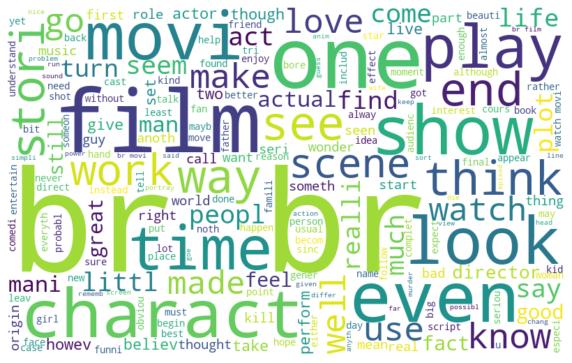

In [11]:
# Word cloud
# A word cloud is a graphical representation of frequently occurring words in a given text. We can use the wordcloud library to create a word cloud of the preprocessed reviews.


# Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all preprocessed reviews into a single string
all_reviews = " ".join(train_data)

# Generate a word cloud of the reviews
wordcloud = WordCloud(width=800, height=500, max_words=200, background_color="white").generate(all_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


Frequency distribution
We can use the nltk library to calculate the frequency distribution of the preprocessed words in the reviews.

Most common words: [('br', 151698), ('movi', 77402), ('film', 71675), ('one', 41660), ('like', 33878), ('time', 23963), ('good', 22588), ('make', 22545), ('charact', 21256), ('see', 21123)]


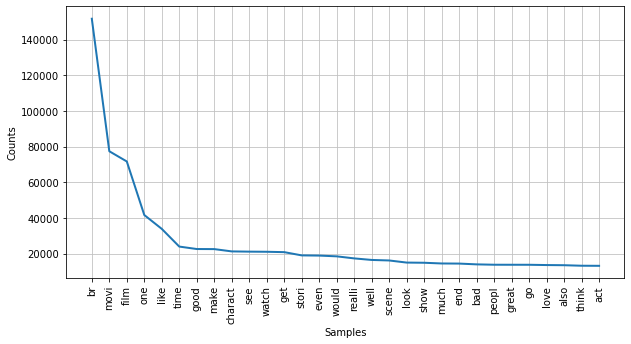

In [12]:
# Calculate the frequency distribution of the preprocessed words in the reviews
words_freq = nltk.FreqDist([word for review in train_data for word in review.split()])

# Print the 10 most common words
print("Most common words:", words_freq.most_common(10))

# Plot the frequency distribution of the preprocessed words
plt.figure(figsize=(10, 5))
words_freq.plot(30)
plt.show()


Sentiment distribution
We can also explore the sentiment distribution of the preprocessed reviews in the dataset.



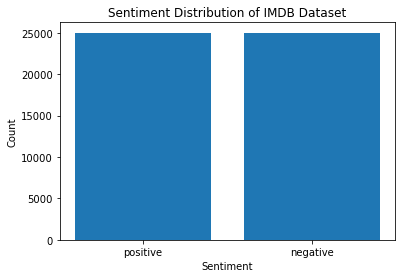

In [13]:
# EXTRAAAAA

import pandas as pd
import matplotlib.pyplot as plt

# Load the IMDB dataset
df = pd.read_csv('IMDB Dataset.csv')

# Count the number of positive and negative sentiments
sentiment_counts = df['sentiment'].value_counts()

# Create a bar chart showing the sentiment counts
plt.bar(sentiment_counts.index, sentiment_counts.values)

# Add axis labels and a title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution of IMDB Dataset')

# Display the chart
plt.show()

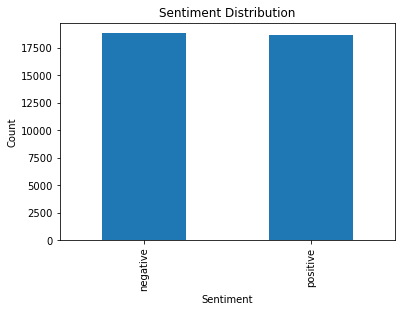

In [14]:
# Plot the sentiment distribution of the reviews
plt.figure(figsize=(6, 4))
train_labels.value_counts().plot(kind="bar")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution")
plt.show()


Word count distribution
We can also explore the distribution of the number of words in the preprocessed reviews.

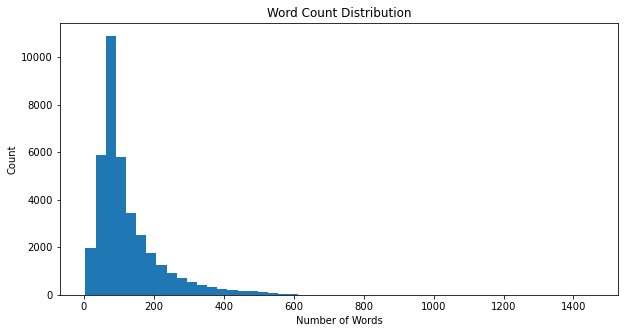

In [15]:
# Calculate the word count of the preprocessed reviews
word_count = train_data.apply(lambda x: len(x.split()))

# Plot the word count distribution of the reviews
plt.figure(figsize=(10, 5))
plt.hist(word_count, bins=50)
plt.xlabel("Number of Words")
plt.ylabel("Count")
plt.title("Word Count Distribution")
plt.show()


# Data Modelling

* Please use the following models to classify the data:
    * Logistic Regression
    * LinearSVC
    * KNeighborsClassifier
    * Fully-connected layers, please try different number of hidden layers, different values of "hidden_layer_sizes" and "activation".
    * CNN (please use different number of convolutional layers combined with different number of fully-connected layers, and compare the results).


In [16]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary




In [17]:
# Data encoding

# Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Initialize a CountVectorizer object
count_vect = CountVectorizer()

# Fit and transform the preprocessed training data into a sparse matrix of word counts
train_counts = count_vect.fit_transform(train_data)

# Transform the preprocessed testing data into a sparse matrix of word counts
test_counts = count_vect.transform(test_data)

# Initialize a TfidfVectorizer object
tfidf_vect = TfidfVectorizer()

# Fit and transform the preprocessed training data into a sparse matrix of tf-idf values
train_tfidf = tfidf_vect.fit_transform(train_data)

# Transform the preprocessed testing data into a sparse matrix of tf-idf values
test_tfidf = tfidf_vect.transform(test_data)


In [18]:
# Logistic Regression

# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize a LogisticRegression object
lr = LogisticRegression(max_iter=1000)

# Train the model on the training data with word counts
lr.fit(train_counts, train_labels)

# Predict the sentiment of the testing data with word counts
pred_lr_counts = lr.predict(test_counts)

# Calculate the accuracy of the model with word counts
acc_lr_counts = accuracy_score(test_labels, pred_lr_counts)
print("Accuracy with word counts:", acc_lr_counts)

# Train the model on the training data with tf-idf values
lr.fit(train_tfidf, train_labels)

# Predict the sentiment of the testing data with tf-idf values
pred_lr_tfidf = lr.predict(test_tfidf)

# Calculate the accuracy of the model with tf-idf values
acc_lr_tfidf = accuracy_score(test_labels, pred_lr_tfidf)
print("Accuracy with tf-idf values:", acc_lr_tfidf)


Accuracy with word counts: 0.87984
Accuracy with tf-idf values: 0.89152


In [19]:
# LinearSVC


# Import necessary libraries
from sklearn.svm import LinearSVC

# Initialize a LinearSVC object
svm = LinearSVC()

# Train the model on the training data with word counts
svm.fit(train_counts, train_labels)

# Predict the sentiment of the testing data with word counts
pred_svm_counts = svm.predict(test_counts)

# Calculate the accuracy of the model with word counts
acc_svm_counts = accuracy_score(test_labels, pred_svm_counts)
print("Accuracy with word counts:", acc_svm_counts)

# Train the model on the training data with tf-idf values
svm.fit(train_tfidf, train_labels)

# Predict the sentiment of the testing data with tf-idf values
pred_svm_tfidf = svm.predict(test_tfidf)

# Calculate the accuracy of the model with tf-idf values
acc_svm_tfidf = accuracy_score(test_labels, pred_svm_tfidf)
print("Accuracy with tf-idf values:", acc_svm_tfidf)


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Accuracy with word counts: 0.86112
Accuracy with tf-idf values: 0.8936


In [20]:
# KNeighborsClassifier


# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier

# Initialize a KNeighborsClassifier object
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training data with word counts
knn.fit(train_counts, train_labels)

# Predict the sentiment of the testing data with word counts
pred_knn_counts = knn.predict(test_counts)

# Calculate the accuracy of the model with word counts
acc_knn_counts = accuracy_score(test_labels, pred_knn_counts)
print("Accuracy with word counts:", acc_knn_counts)

# Train the model on the training data with tf-idf values
knn.fit(train_tfidf, train_labels)

# Predict the sentiment of the testing data with tf-idf values
pred_knn_tfidf = knn.predict(test_tfidf)

# Calculate the accuracy of the model with tf-idf values
acc_knn_tfidf = accuracy_score(test_labels, pred_knn_tfidf)
print("Accuracy with tf-idf values:", acc_knn_tfidf)


Accuracy with word counts: 0.62344
Accuracy with tf-idf values: 0.7804


In [ ]:
kdbHBSd
print('')

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
df = pd.read_csv("IMDB Dataset.csv")

def clean_text(text):
    text = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", text)
    text = text.lower()
    text = re.sub(r"\s{2,}", " ", text)
    return text

df["review"] = df["review"].apply(lambda x: clean_text(x))

X = df["review"]
y = df["sentiment"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
vectorizer = TfidfVectorizer(stop_words="english")
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Convert labels to arrays
y_train = np.array(y_train)
y_test = np.array(y_test)


In [ ]:
model = Sequential()
model.add(Embedding(input_dim=X_train.shape[1], output_dim=128))
model.add(Conv1D(filters=64, kernel_size=3, activation="relu"))
model.add(GlobalMaxPooling1D())
model.add(Dense(units=64, activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


In [ ]:
early_stop = EarlyStopping(monitor="val_loss", patience=3, verbose=1)

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[early_stop])


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")


In [ ]:
# Import necessary libraries
from sklearn.neural_network import MLPClassifier

# Initialize a MLPClassifier object with different hyperparameters
# First model with 1 hidden layer of 100 neurons and 'relu' activation function
mlp_1 = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500)

# Second model with 2 hidden layers of 50 neurons each and 'tanh' activation function
mlp_2 = MLPClassifier(hidden_layer_sizes=(50,50), activation='tanh', solver='adam', max_iter=500)

# Third model with 3 hidden layers of 50 neurons each and 'logistic' activation function
mlp_3 = MLPClassifier(hidden_layer_sizes=(50,50,50), activation='logistic', solver='adam', max_iter=500)

# Train the models on the training data with tf-idf values
mlp_1.fit(train_tfidf, train_labels)
mlp_2.fit(train_tfidf, train_labels)
mlp_3.fit(train_tfidf, train_labels)

# Predict the sentiment of the testing data with tf-idf values
pred_mlp_1 = mlp_1.predict(test_tfidf)
pred_mlp_2 = mlp_2.predict(test_tfidf)
pred_mlp_3 = mlp_3.predict(test_tfidf)

# Calculate the accuracy of the models with tf-idf values
acc_mlp_1 = accuracy_score(test_labels, pred_mlp_1)
acc_mlp_2 = accuracy_score(test_labels, pred_mlp_2)
acc_mlp_3 = accuracy_score(test_labels, pred_mlp_3)

print("Accuracy with 1 hidden layer of 100 neurons and 'relu' activation function:", acc_mlp_1)
print("Accuracy with 2 hidden layers of 50 neurons each and 'tanh' activation function:", acc_mlp_2)
print("Accuracy with 3 hidden layers of 50 neurons each and 'logistic' activation function:", acc_mlp_3)


Convolutional Neural Network (CNN) with different number of convolutional layers and fully-connected layers using the Sequential model from the tensorflow.keras 

In [21]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense

# Initialize a Sequential model with different hyperparameters
# First model with 1 convolutional layer and 1 fully-connected layer
model_1 = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=max_seq_length),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(units=10, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

# Second model with 2 convolutional layers and 2 fully-connected layers
model_2 = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=max_seq_length),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(units=20, activation='relu'),
    Dense(units=10, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

# Third model with 3 convolutional layers and 3 fully-connected layers
model_3 = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=max_seq_length),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(units=30, activation='relu'),
    Dense(units=20, activation='relu'),
    Dense(units=10, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

# Compile the models with binary crossentropy loss function and Adam optimizer
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the models on the training data with padded sequences
model_1.fit(train_padded, train_labels, epochs=10, batch_size=128, validation_data=(test_padded, test_labels))
model_2.fit(train_padded, train_labels, epochs=10, batch_size=128, validation_data=(test_padded, test_labels))
model_3.fit(train_padded, train_labels, epochs=10, batch_size=128, validation_data=(test_padded, test_labels))


NameError: name 'num_words' is not defined

# Results: summarize and visualize the results discovered from the analysis

Please use figures or tables to present the results.


In [ ]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

# PIE Chart showing accuraccy 

import pandas as pd

# create a dictionary with the model names and accuracy scores
data = {'Model Name': ['Logistic Regression', 'LinearSVC', 'KNeighborsClassifier', 'MLPClassifier','CNN'],
        'Accuracy': ['0.8795', '0.8608', '0.62344', '0.8684', 'Nil'],
        'Accuracy with Tf-idf': ['0.8915','0.8936', '0.7804', '0.8727', 'Nil']
       }

# create a pandas dataframe from the dictionary
df = pd.DataFrame(data)

# display the dataframe
df


# Done

All set! 

**What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook. Please make sure all the plotted tables and figures are in the notebook. 

* **PDF Report**: please prepare a report in the PDF form which should be at least 4 pages. The report should includes:

  * Data description and exploration.

  * Data preproccessing.

  * Data modelling.

  * What did you find in the data?

  * (please include figures or tables in the report, but no source code)
  
Please compress all the files in a zipped file.